# Example Interrupted Time Series (ITS) with sci-kit learn models

This notebook shows an example of using interrupted time series, where we do not have untreated control units of a similar nature to the treated unit and we just have a single time series of observations and the predictor variables are simply time and month.

In [1]:
import pandas as pd

import causalpy as cp

In [2]:
%config InlineBackend.figure_format = 'retina'

## Load data

In [3]:
df = (
    cp.load_data("its")
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .set_index("date")
)

treatment_time = pd.to_datetime("2017-01-01")
df.head()

,month,year,t,y
date,,,,
2010-01-31,1,2010,0,25.058186
2010-02-28,2,2010,1,27.189812
2010-03-31,3,2010,2,26.487551
2010-04-30,4,2010,3,31.241716
2010-05-31,5,2010,4,40.753973


## Run the analysis

In [4]:
result = cp.InterruptedTimeSeries(
    df,
    treatment_time,
    formula="y ~ 1 + t + C(month)",
    model=cp.skl_models.LinearRegression(),
)

## Examine the results

OLSPlotComponent - plot_pre_post


ValueError: x and y must have same first dimension, but have shapes (36,) and (1296,)

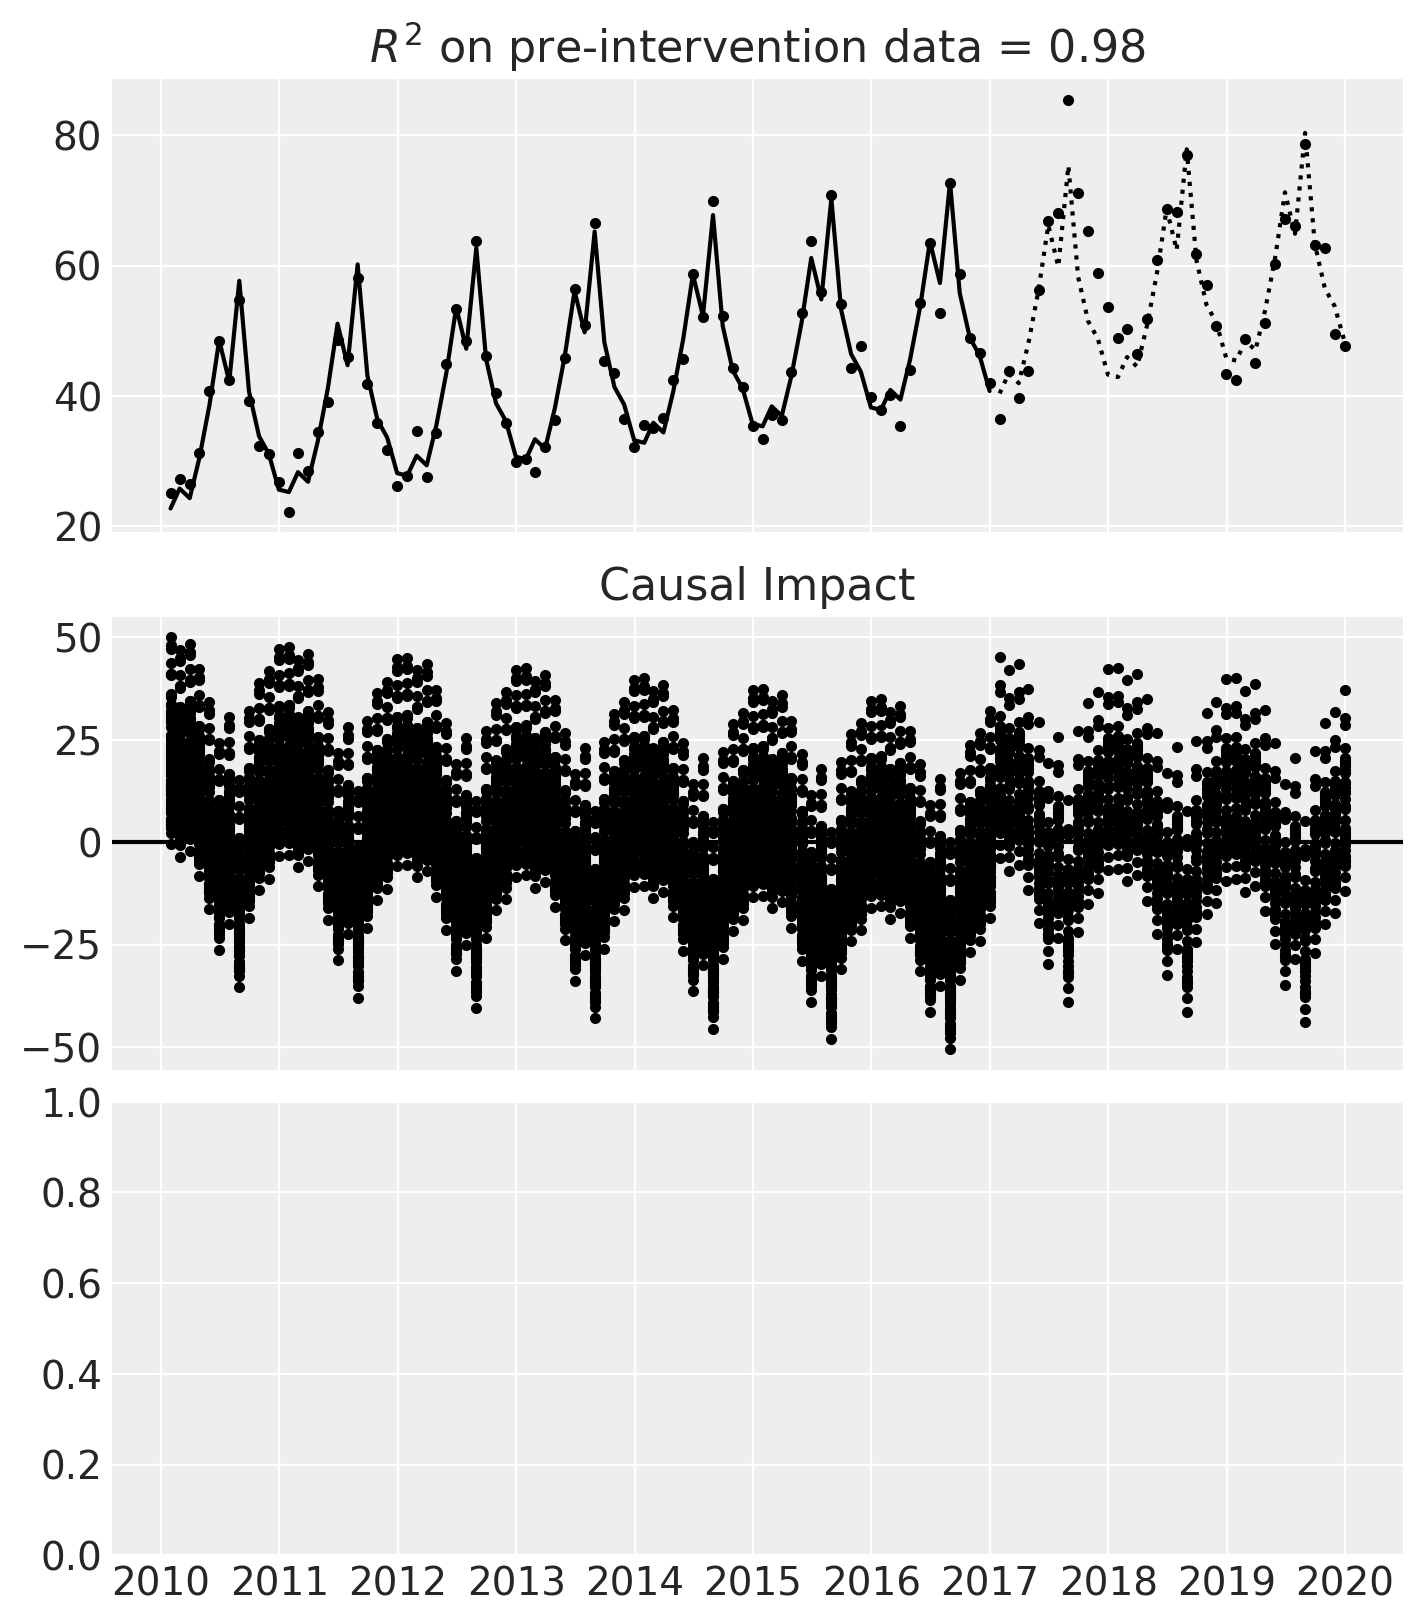

In [5]:
fig, ax = result.plot()

In [6]:
result.summary(round_to=3)

==================================Pre-Post Fit==================================
Formula: y ~ 1 + t + C(month)
Model coefficients:
  Intercept     	         0
  C(month)[T.2] 	      2.85
  C(month)[T.3] 	      1.16
  C(month)[T.4] 	      7.15
  C(month)[T.5] 	        15
  C(month)[T.6] 	      24.8
  C(month)[T.7] 	      18.2
  C(month)[T.8] 	      33.5
  C(month)[T.9] 	      16.2
  C(month)[T.10]	      9.19
  C(month)[T.11]	      6.28
  C(month)[T.12]	     0.578
  t             	      0.21
